In [1]:
%matplotlib inline

In [17]:
from make_mock import retrieve_halo_catalog

log10_msub_min, log10_mhost_min = 11.25, 11.25
hosts, subs = retrieve_halo_catalog(log10_msub_min, log10_mhost_min)

In [18]:
import make_mock
reload(make_mock)

is_central, mpeak_mock, sm_mock, mhost_mock = make_mock.make_mock(hosts, subs, sm_min=10**9.75)
num_gals1 = len(sm_mock)
num_sats1 = np.count_nonzero(is_central == False)
fsat1 = num_sats1/float(num_gals1)
print("Satellite fraction using new methods = {0:.2f}".format(fsat1))

Satellite fraction using new methods = 0.93


In [19]:
from halotools.empirical_models import PrebuiltSubhaloModelFactory
from halotools.sim_manager import CachedHaloCatalog

halocat = CachedHaloCatalog()
model = PrebuiltSubhaloModelFactory('behroozi10', redshift=0)
model.populate_mock(halocat)

In [20]:
mask = model.mock.galaxy_table['stellar_mass'] > 10**9.75
gals2 = model.mock.galaxy_table[mask]

cens2_mask = gals2['halo_upid'] == -1

cens2 = gals2[cens2_mask]
sats2 = gals2[~cens2_mask]

num_gals2 = len(gals2)
num_sats2 = len(sats2)
fsat2 = num_sats2/float(num_gals2)

print("Satellite fraction using old methods = {0:.2f}".format(fsat2))

Satellite fraction using old methods = 0.21


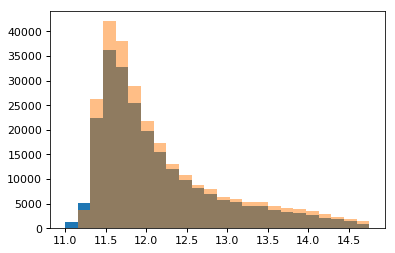

In [21]:
fig, ax = plt.subplots(1, 1)

log_mhost_bins = np.linspace(11, 14.75, 25)

__=ax.hist(np.log10(gals2['halo_mvir_host_halo']), bins=log_mhost_bins)
__=ax.hist(np.log10(mhost_mock), bins=log_mhost_bins, alpha=0.5)

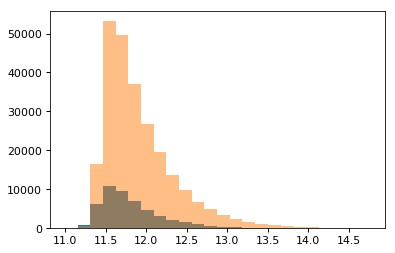

In [23]:
fig, ax = plt.subplots(1, 1)

log_mpeak_bins = np.linspace(11, 14.75, 25)

__=ax.hist(np.log10(sats2['halo_mpeak']), bins=log_mpeak_bins)
__=ax.hist(np.log10(mpeak_mock[~is_central]), bins=log_mpeak_bins, alpha=0.5)

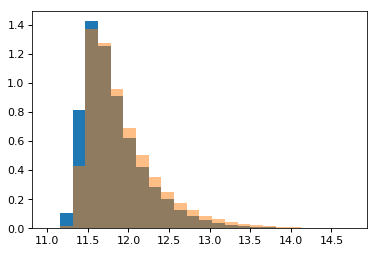

In [24]:
fig, ax = plt.subplots(1, 1)

log_mpeak_bins = np.linspace(11, 14.75, 25)

__=ax.hist(np.log10(sats2['halo_mpeak']), bins=log_mpeak_bins, normed=True)
__=ax.hist(np.log10(mpeak_mock[~is_central]), bins=log_mpeak_bins, alpha=0.5, normed=True)

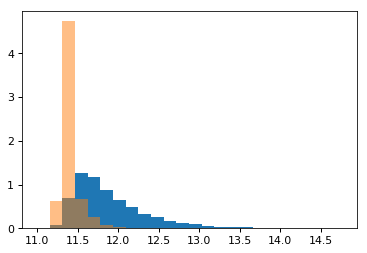

In [25]:
fig, ax = plt.subplots(1, 1)

log_mpeak_bins = np.linspace(11, 14.75, 25)

__=ax.hist(np.log10(cens2['halo_mpeak']), bins=log_mpeak_bins, normed=True)
__=ax.hist(np.log10(mpeak_mock[is_central]), bins=log_mpeak_bins, alpha=0.5, normed=True)

In [28]:
mpeak_mock[is_central].max()/1e12

9.2860003123200006